## Find longest chain of cities names
By Last char and first char<br>
Example:<br>
<i>Bangkok - Kuala Lumpur - Riyadh</i>.....

In [1]:
cities = ["Amsterdam", "Moscow", "Paris", "Minsk", "San Diego", "Miami", "Orlando", "Mexico", "Los Angeles", "Oslo", "San Francisco", 
         "Chicago", "Toronto", "Philadelphia", "Atlanta", "Boston", "Monterrey", "Detroit", "Vancouver","Mumbai","Beijing","Dhaka","Osaka","New York","Karachi","Buenos Aires","Chongqing","Istanbul"]

# cities = "Tokyo,Delhi,Shanghai,San Paulo,Mexico City,Cairo,Mumbai,Beijing,Dhaka,Osaka,New York,Karachi,Buenos Aires,Chongqing,Istanbul,Kolkata,Manila,Lagos,Rio de Janeiro,Tianjin,Kinshasa,Guangzhou,Los Angeles,Moscow,Shenzhen,Lahore,Bangalore,Paris,Bogot?,Jakarta,Chennai,Lima,Bangkok,Seoul,Nagoya,Hyderabad,London,Tehran,Chicago,Chengdu,Nanjing,Wuhan,Ho Chi Minh City,Luanda,Ahmedabad,Kuala Lumpur,Xi'an,Hong Kong,Dongguan,Hangzhou,Foshan,Shenyang,Riyadh,Baghdad,Santiago,Surat,Madrid,Suzhou,Pune,Harbin,Houston,Dallas,Toronto,Dar es Salaam,Miami,Belo Horizonte,Singapore,Philadelphia,Atlanta,Fukuoka,Khartoum,Barcelona,Johannesburg,Saint Petersburg,Qingdao,Dalian,Washington,Yangon,Alexandria,Jinan,Guadalajara"
# cities = cities.split(",")

In [2]:
print("All Cities:", len(cities))

All Cities: 28


In [3]:
from tqdm.notebook import tqdm
from itertools import permutations
import array
import gc
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
def check_chain(chain):
    flag = True
    count = 0
    for i in chain:
        if count+1 == len(chain): break        
        city1 = cities[chain[count]].lower()
        city2 = cities[chain[count+1]].lower() 
        if city1[len(city1)-1] != city2[0]: flag = False; break
        count += 1
    return flag

In [5]:
chains = []
variants = permutations(range(len(cities)), 2)
for i, chain in enumerate(variants):
    if check_chain(chain):
        #print(list(chain))
        chains.append(list(chain))
CHAINS_CONST = tuple(chains)

In [6]:
chains = {}
for c in tqdm(CHAINS_CONST): 
    if c[0] in chains:
        chains[c[0]].append(c[1])
    else:
        chains[c[0]] = [c[1]]
#chains            

  0%|          | 0/46 [00:00<?, ?it/s]

In [7]:
for i in range(len(cities)):
    if i in chains:
        names = [cities[x] for x in chains[i]]
        print(cities[i], names)
    else:
        print(cities[i])

Amsterdam ['Moscow', 'Minsk', 'Miami', 'Mexico', 'Monterrey', 'Mumbai']
Moscow
Paris ['San Diego', 'San Francisco']
Minsk ['Karachi']
San Diego ['Orlando', 'Oslo', 'Osaka']
Miami ['Istanbul']
Orlando ['Oslo', 'Osaka']
Mexico ['Orlando', 'Oslo', 'Osaka']
Los Angeles ['San Diego', 'San Francisco']
Oslo ['Orlando', 'Osaka']
San Francisco ['Orlando', 'Oslo', 'Osaka']
Chicago ['Orlando', 'Oslo', 'Osaka']
Toronto ['Orlando', 'Oslo', 'Osaka']
Philadelphia ['Amsterdam', 'Atlanta']
Atlanta ['Amsterdam']
Boston ['New York']
Monterrey
Detroit ['Toronto']
Vancouver
Mumbai ['Istanbul']
Beijing
Dhaka ['Amsterdam', 'Atlanta']
Osaka ['Amsterdam', 'Atlanta']
New York ['Karachi']
Karachi ['Istanbul']
Buenos Aires ['San Diego', 'San Francisco']
Chongqing
Istanbul ['Los Angeles']


<AxesSubplot:>

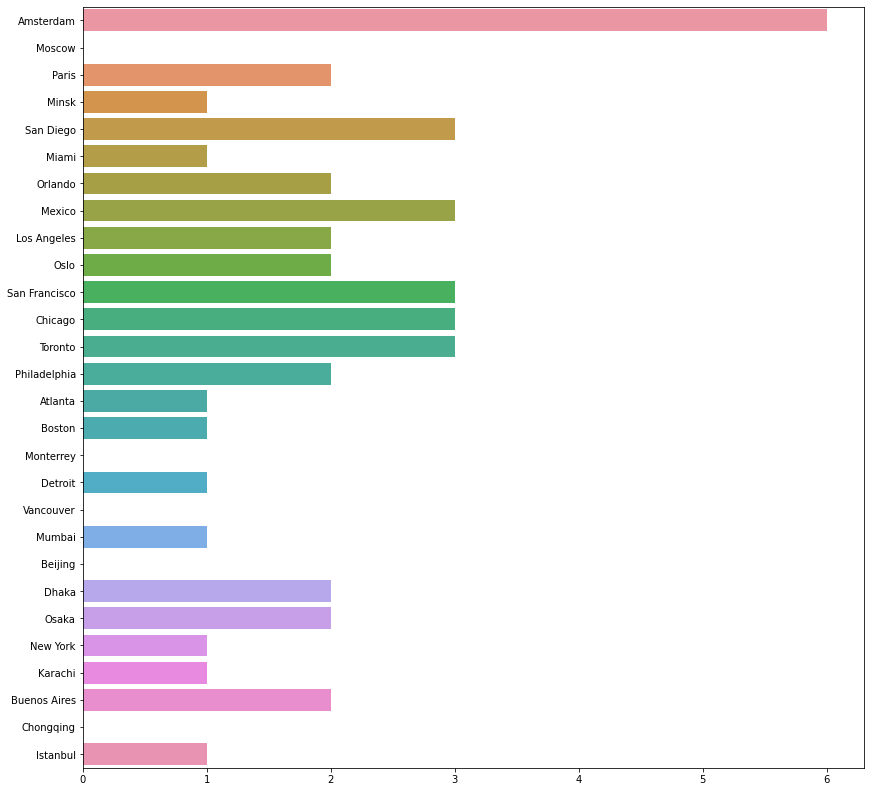

In [8]:
plt.figure(figsize = (14,14))
sns.barplot(y = cities, x = [len(chains[x]) if x in chains else 0 for x in range(len(cities))])

In [9]:
%%time
all_chains = {}
chains = list(CHAINS_CONST)

for step in range(len(CHAINS_CONST)):
#for step in range(3):
    
    if 'chains_temp' in locals(): del chains_temp; gc.collect()
    chains_temp = []
    flag = True
    for c in tqdm(chains):
        for c1 in CHAINS_CONST:
            if c[len(c) - 1] == c1[0] and c1[1] not in c:
                #a = list(c) # faster works, but need more memory
                a = array.array('I', c) # low memory usage
                a.append(c1[1])
                chains_temp.append(a)
                flag = False
    if flag == True: break
    del chains
    chains = chains_temp

    
    print(step+3, "length found:", len(chains), "chains")
    all_chains[step+3] = len(chains)

  0%|          | 0/46 [00:00<?, ?it/s]

3 length found: 98 chains


  0%|          | 0/98 [00:00<?, ?it/s]

4 length found: 188 chains


  0%|          | 0/188 [00:00<?, ?it/s]

5 length found: 354 chains


  0%|          | 0/354 [00:00<?, ?it/s]

6 length found: 586 chains


  0%|          | 0/586 [00:00<?, ?it/s]

7 length found: 791 chains


  0%|          | 0/791 [00:00<?, ?it/s]

8 length found: 925 chains


  0%|          | 0/925 [00:00<?, ?it/s]

9 length found: 967 chains


  0%|          | 0/967 [00:00<?, ?it/s]

10 length found: 754 chains


  0%|          | 0/754 [00:00<?, ?it/s]

11 length found: 338 chains


  0%|          | 0/338 [00:00<?, ?it/s]

12 length found: 68 chains


  0%|          | 0/68 [00:00<?, ?it/s]

Wall time: 758 ms


In [10]:
all_chains

{3: 98,
 4: 188,
 5: 354,
 6: 586,
 7: 791,
 8: 925,
 9: 967,
 10: 754,
 11: 338,
 12: 68}

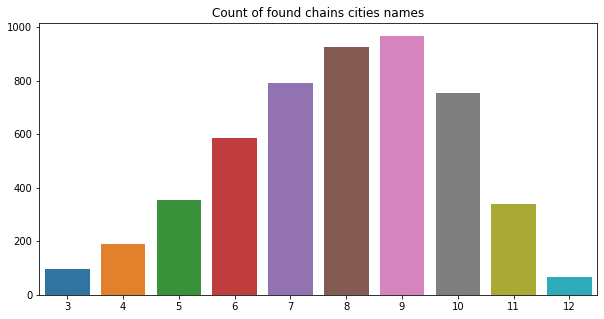

In [11]:
plt.figure(figsize = (10,5))
sns.barplot(x = list(all_chains.keys()), y = list(all_chains.values()))
plt.title("Count of found chains cities names")
plt.show()

#### Show longest chains

In [12]:
max_show = 100
for chain in chains[:max_show]:
    names = []
    for i in chain:
        names.append(cities[i])        
    print("Chain Lenght:", len(names), names)    

Chain Lenght: 12 ['Paris', 'San Diego', 'Orlando', 'Oslo', 'Osaka', 'Atlanta', 'Amsterdam', 'Minsk', 'Karachi', 'Istanbul', 'Los Angeles', 'San Francisco']
Chain Lenght: 12 ['Paris', 'San Diego', 'Orlando', 'Osaka', 'Atlanta', 'Amsterdam', 'Minsk', 'Karachi', 'Istanbul', 'Los Angeles', 'San Francisco', 'Oslo']
Chain Lenght: 12 ['Paris', 'San Diego', 'Oslo', 'Orlando', 'Osaka', 'Atlanta', 'Amsterdam', 'Minsk', 'Karachi', 'Istanbul', 'Los Angeles', 'San Francisco']
Chain Lenght: 12 ['Paris', 'San Diego', 'Oslo', 'Osaka', 'Atlanta', 'Amsterdam', 'Minsk', 'Karachi', 'Istanbul', 'Los Angeles', 'San Francisco', 'Orlando']
Chain Lenght: 12 ['Paris', 'San Diego', 'Osaka', 'Atlanta', 'Amsterdam', 'Minsk', 'Karachi', 'Istanbul', 'Los Angeles', 'San Francisco', 'Orlando', 'Oslo']
Chain Lenght: 12 ['Paris', 'San Diego', 'Osaka', 'Atlanta', 'Amsterdam', 'Minsk', 'Karachi', 'Istanbul', 'Los Angeles', 'San Francisco', 'Oslo', 'Orlando']
Chain Lenght: 12 ['Paris', 'San Francisco', 'Orlando', 'Oslo', '